In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

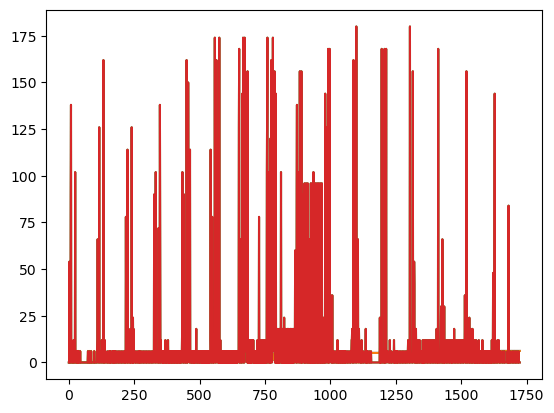

Index(['target_doa', 'duration', 'snr', 'noise_type', 'add_reverberation',
       'mc_seed', 'loc_method', 'freq_min', 'freq_max', 'sv_method', 'nObs',
       'seed', 'sv_normalization', 'doas_est_idx_s1', 'doas_ref_idx_s1',
       'doas_ref_s1_az', 'doas_ref_s1_el', 'doas_est_s1_az', 'doas_est_s1_el',
       'error_s1', 'time', 'exp_name', 'error_s1_'],
      dtype='object')

In [3]:
# load data
df = pd.read_csv('results/experiment_results_exp-0.csv')


def calc_ae(a,b):
    x = np.abs(a-b)
    return np.min(np.array((x, np.abs(360-x))), axis=0)

df['error_s1_'] = calc_ae(np.rad2deg(df['doas_est_s1_az']), np.rad2deg(df['doas_ref_s1_az']))

assert np.allclose(df['error_s1_'], np.rad2deg(df['error_s1']))

plt.plot(df['doas_ref_s1_az'])
plt.plot(df['doas_est_s1_az'])
plt.plot(df['error_s1_'])
plt.plot(np.rad2deg(df['error_s1']))
plt.show()

df.columns

In [4]:
# sns.relplot(data=df, x='snr', y='error_s1_', hue='nObs', style='sv_method', markers=True, col='loc_method', kind='line')

In [ ]:
df.pivot_table(
        values='error_s1_', 
        columns=['sv_method', 'nObs', 'snr'],
        index=['loc_method' , 'noise_type'], 
        aggfunc='mean'
).style.background_gradient(cmap='viridis', axis=1)